In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
n = 300 ## number of samples
k = 3 ## number of clusters
d = 2 ## number of features
y = 0 ## cluster identities


In [20]:
def euc (x,y):
    x = np.array(x)
    y = np.array(y)
    return sum((x-y)**2)

euc([1,1] , [3,4])


13

### my code

In [21]:
## 1 generate a set of means in the size of k & d

means = np.random.randn(k,d) + np.random.randint(0,5, size=(k,d)) ## random normal distributed k,c array scalled to a mean of 0 to 5

## another option to set a fixed mean

# means = np.array(
#     [
#         [0,0],
#         [0,5],
#         [5,5]
#     ]
#     )

means

## 2 generate data matrix n x d

data = np.random.randn(n,d)

X = data
X [0:100] = X [0:100] + means[0]
X [100:200] = X[100:200] + means[1]
X [200:] = X[200:] + means[2]

X = np.column_stack([X, np.zeros(300)])


converged on step: 11


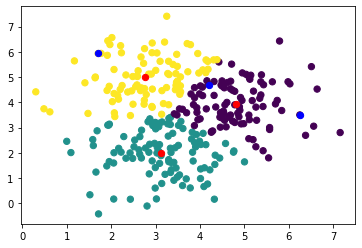

In [22]:


## initialization
## randomly asign cluster centers

cluster_centers = np.zeros((k,d))

for i in range(k):
    z = np.random.choice(n)
    cluster_centers[i] = X[z,:2]

cluster_centers_original = cluster_centers.copy()

## k-mean loop

max_iter = 20
cluster_id = X[:,2]
saved_cluster_id = []


## check convergence

for it in range(max_iter):
    old_cluster_id = cluster_id.copy()
    saved_cluster_id.append(old_cluster_id)

## 1: determine cluster identities

    for i in range(n): # for every observation
        l = []
        closest_k = -1
        min_dist = float('inf')
        for j in range(k): # for every observation calculate the euc distance of the 3 points k
            dist = (X[i,:2] - cluster_centers[j])@(X[i,:2]-cluster_centers[j])
            dist2 = euc(X[i,:2], cluster_centers[j])
            l.append(dist)
        #     if dist < min_dist:
        #         min_dist = dist
        #         closest_k = j
        # cluster_id[i] = closest_k
        lowest = min(l)
        id = l.index(lowest)
        cluster_id[i] = id

    ## 2: recalculate means & update cluster centers

    for kk in range(k):
        # cluster_centers[kk,:] = X[cluster_id == kk, :2].mean(axis=0) ## new cluster center
        cluster_centers[kk,:] = X[X[:,2] == kk, :2].mean(axis=0) ## new cluster center

    ## check for convergence
    if np.all(old_cluster_id == cluster_id):
        print(f'converged on step: {it}')
        break

plt.scatter(X[:,0] , X[:,1] , s=40, c=cluster_id , marker="o")
plt.scatter(cluster_centers[:,0] , cluster_centers[:,1] , s=40, c='red' , marker="o")
plt.scatter(cluster_centers_original[:,0] , cluster_centers_original[:,1] , s=40, c='blue' , marker="o")